Examen Final - Federico Sanches

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from arch.unitroot import DFGLS
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from scipy import signal

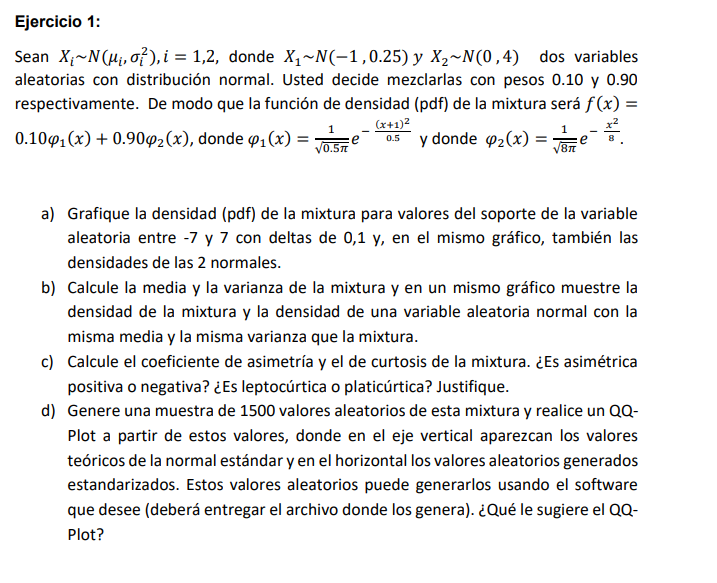

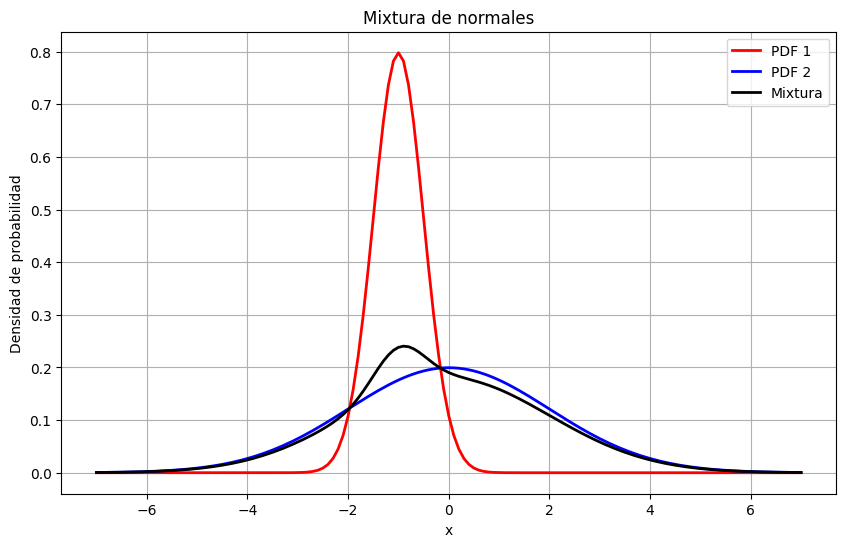

In [ ]:
# a) Calculo las PDF y la mixtura
valores = np.arange(-7, 7.1, 0.1)
df = pd.DataFrame({'values': valores})

w1 = 0.10
mu1 = -1
var1 = 0.25

w2 = 0.90
mu2 = 0
var2 = 4

# Genero las pdfs
df['pdf_1'] = stats.norm.pdf(df['values'], loc=mu1, scale=np.sqrt(var1))
df['pdf_2'] = stats.norm.pdf(df['values'], loc=mu2, scale=np.sqrt(var2))
df['pdf_mixture'] = w1 * df['pdf_1'] + w2 * df['pdf_2']

plt.figure(figsize=(10, 6))
plt.plot(df['values'], df['pdf_1'], label="PDF 1", color="red", linewidth=2)
plt.plot(df['values'], df['pdf_2'], label="PDF 2", color="blue", linewidth=2)
plt.plot(df['values'], df['pdf_mixture'], label="Mixtura", color="black", linewidth=2)
plt.title("Mixtura de normales")
plt.xlabel("x")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)
plt.show()

Media: -0.1
Varianza: 3.715


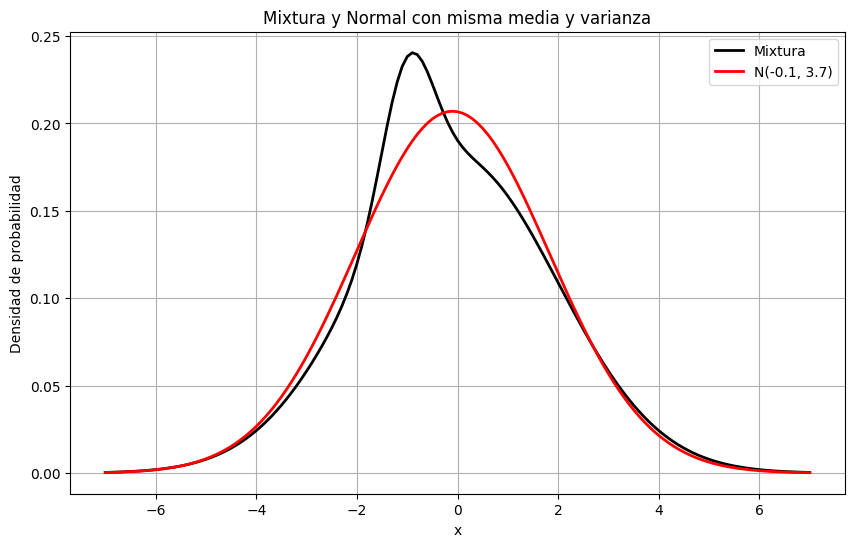

In [4]:
# b)
# Media de la mixtura
mu_mix = w1 * mu1 + w2 * mu2

print("Media:", mu_mix)

# Varianza de la mixtura
var_mix = w1 * (var1 + (mu1 - mu_mix) ** 2) + w2 * (var2 + (mu2 - mu_mix) ** 2)
std_mix = np.sqrt(var_mix)

print("Varianza:", round(var_mix,5))

# Calculo de una normal con media y varianza igual a la mixtura
df['pdf_3'] = stats.norm.pdf(df['values'], loc=mu_mix, scale=std_mix)

plt.figure(figsize=(10, 6))
plt.plot(df['values'], df['pdf_mixture'], label="Mixtura", color="black", linewidth=2)
plt.plot(df['values'], df['pdf_3'], label="N(-0.1, 3.7)", color="red", linewidth=2)
plt.title("Mixtura y Normal con misma media y varianza")
plt.xlabel("x")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# c)
# Tercer momento centrado
mu_3 = (
    w1 * ((mu1 - mu_mix) ** 3 + 3 * (mu1 - mu_mix) * var1)
    + w2 * ((mu2 - mu_mix) ** 3 + 3 * (mu2 - mu_mix) * var2))

# Cuarto momento centrado
mu_4 = (
    w1 * ((mu1 - mu_mix) ** 4 + 6 * (mu1 - mu_mix) ** 2 * var1 + 3 * var1 ** 2)
    + w2 * ((mu2 - mu_mix) ** 4 + 6 * (mu2 - mu_mix) ** 2 * var2 + 3 * var2 ** 2))

# Asimetría y kurtosis
skewness = mu_3 / (std_mix ** 3)
kurtosis_total = mu_4 / (var_mix ** 2)
kurtosis_exceso = kurtosis_total - 3

print("Asimetría:", round(skewness,5))
print("Kurtosis:", round(kurtosis_total,5))
print("Kurtosis en Exceso:", round(kurtosis_exceso,5))
print(f"\nDel resultado anterior podemos ver que por un lado la Kurtosis en Exceso es: {round(kurtosis_exceso,5)} > 0 lo cual nos indica por un lado que es Leptocurtica.")
print(f"Por otro lado el coeficiente de Asimetria tambien es mayor a 0 (positiva), {round(skewness,5)} > 0, indicandonos una cola derecha mas pesada, lo cual puede verse claramente en el grafico")

Asimetría: 0.13135
Kurtosis: 3.16073
Kurtosis en Exceso: 0.16073

Del resultado anterior podemos ver que por un lado la Kurtosis en Exceso es: 0.16073 > 0 lo cual nos indica por un lado que es Leptocurtica.
Por otro lado el coeficiente de Asimetria tambien es mayor a 0 (positiva), 0.13135 > 0, indicandonos una cola derecha mas pesada, lo cual puede verse claramente en el grafico


Media: -0.13003854041268337
Desviación estándar: 1.9287335996000052


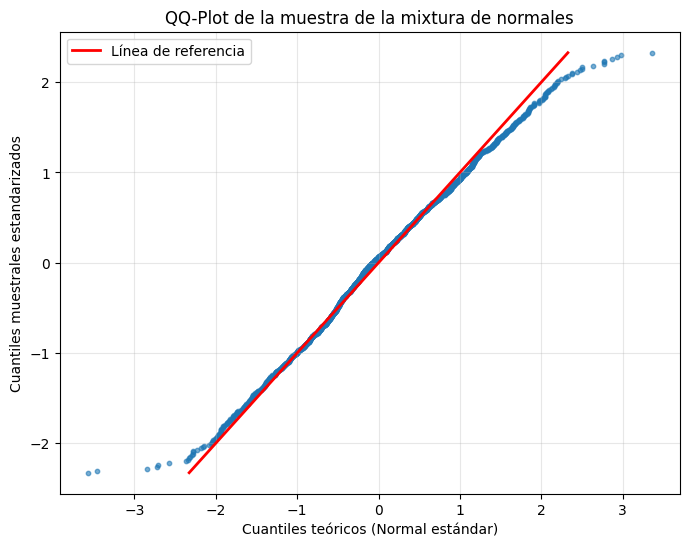

[ 1.09475559 -0.33299742 -0.26162368 ...  1.14412733  0.75165129
  0.12207973]

Graficando el QQ-Plot, nos damos cuenta que efectivamente la muestra es asimetrica + y curtosis en exceso > 0; y podemos ver como en la parte superior del grafico hay valores que se escapan de la linea teorica


In [11]:
# d)
n = 1500
weights = [w1, w2]
mus = [mu1, mu2]
sigmas = [np.sqrt(var1), np.sqrt(var2)]

sample = np.zeros(n)
for i in range(n):
    component = np.random.choice([0, 1], p=weights)
    sample[i] = np.random.normal(mus[component], sigmas[component])

print(f"Media: {np.mean(sample)}")
print(f"Desviación estándar: {np.std(sample)}")

# Estandarizamos la muestra
sample_standardized = (sample - np.mean(sample)) / np.std(sample)

# Ordenamos la muestra
sample_sorted = np.sort(sample_standardized)

# Calcular los cuantiles teóricos de la distribución normal estándar
theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(sample_sorted)))

# Creamos el QQ-plot
plt.figure(figsize=(8, 6))
plt.scatter(sample_sorted, theoretical_quantiles, alpha=0.6, s=10)

# Agregar línea de referencia (línea diagonal perfecta)
plt.plot([theoretical_quantiles.min(), theoretical_quantiles.max()], 
         [theoretical_quantiles.min(), theoretical_quantiles.max()], 
         'r-', linewidth=2, label='Línea de referencia')

plt.xlabel("Cuantiles teóricos (Normal estándar)")
plt.ylabel("Cuantiles muestrales estandarizados")
plt.title("QQ-Plot de la muestra de la mixtura de normales")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(sample_standardized)
print(f"\nGraficando el QQ-Plot, nos damos cuenta que efectivamente la muestra es asimetrica + y curtosis en exceso > 0; y podemos ver como en la parte superior del grafico hay valores que se escapan de la linea teorica")

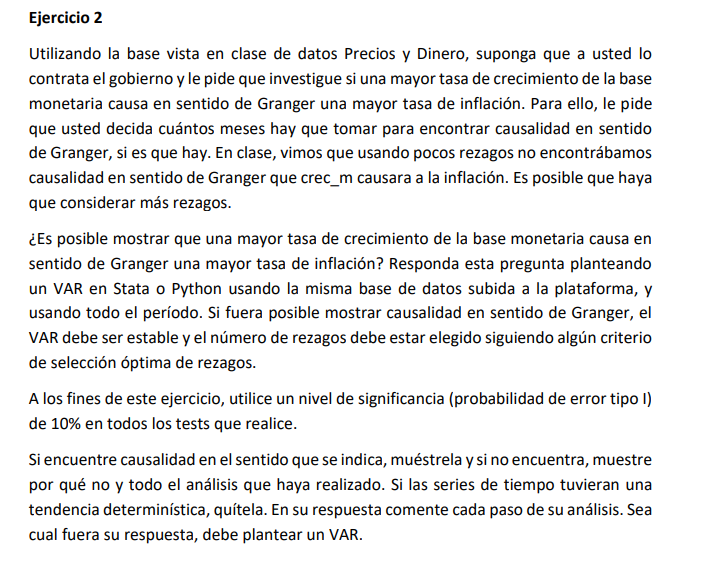

        MMYY         IPC           M      M_en_ARS  inflacion    crec_m
0 2003-01-01  100.000000  100.000000  29609.920333        NaN       NaN
1 2003-02-01  100.566796   99.359830  29420.366429   0.005668 -0.006402
2 2003-03-01  101.155116  102.628052  30388.084290   0.005850  0.032893
3 2003-04-01  101.212513  104.258927  30870.985333   0.000567  0.015891
4 2003-05-01  100.817908  111.804321  33105.170323  -0.003899  0.072372


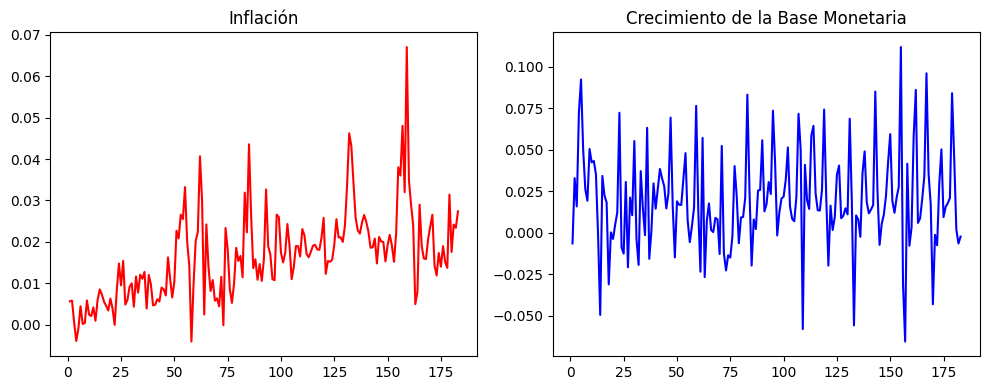

Del grafico podemos intuir que hay alguna tendencia deterministica en ambas series


In [16]:
# Cargo el data set de Precios y Dinero
df = pd.read_excel('Precios_y_Dinero.xlsx', sheet_name='Hoja1', usecols='A:D')

# Genero las columnas de inflacion y la tasa de crecimiento monetario
df["inflacion"] = df["IPC"] / df["IPC"].shift(1) - 1
df["crec_m"] = df["M"] / df["M"].shift(1) - 1

print(df.head())

# Grafico ambas series para tener una idea de como se ven
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(df["inflacion"], color='red')
axes[0].set_title("Inflación")
axes[1].plot(df["crec_m"], color='blue')
axes[1].set_title("Crecimiento de la Base Monetaria")

plt.tight_layout()
plt.show()

print(f"Del grafico podemos intuir que hay alguna tendencia deterministica en ambas series")

ADF para Inflacion con C
Estadístico ADF: -4.457970592047384
p-valor: 0.00023403966364150578
Número de rezagos usados: 1
Número de observaciones usadas: 181
Valores críticos: {'1%': -3.467004502498507, '5%': -2.8776444997243558, '10%': -2.575355189707274} 

ADF para Inflacion con CT
Estadístico ADF: -7.720398146539164
p-valor: 3.1636716608129587e-10
Número de rezagos usados: 0
Número de observaciones usadas: 182
Valores críticos: {'1%': -4.009392790586421, '5%': -3.434893396561173, '10%': -3.141378799874199} 


En ambos casos rechazamos al 10%, pero vamos a corrobar que la T.D. es significativa o no; para esto vamos a correr una regresion con el numero de lags arrojados por ADF corrido con CT

                            OLS Regression Results                            
Dep. Variable:              inflacion   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:        

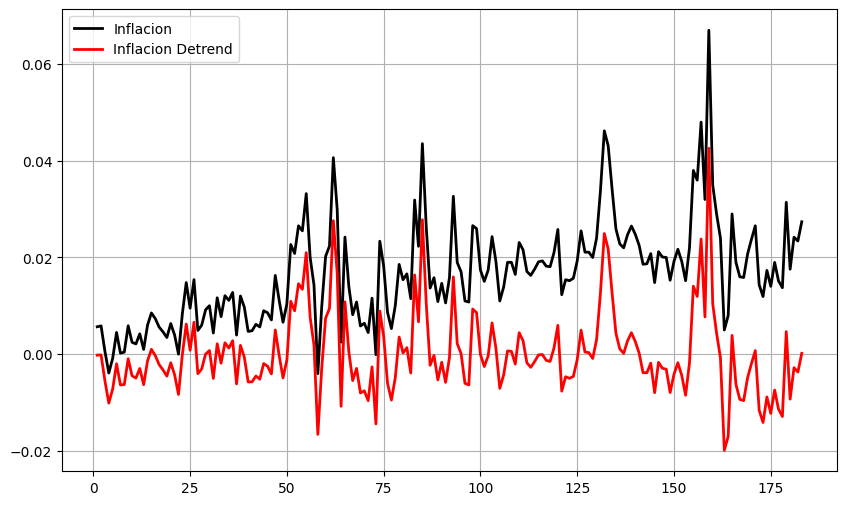

In [27]:
# Vamos a correr el Test de ADF para ver si las series son estacionarias o no

adf = adfuller(df["inflacion"].dropna(), regression="c", autolag="AIC")
print("ADF para Inflacion con C")
print("Estadístico ADF:", adf[0])
print("p-valor:", adf[1])
print("Número de rezagos usados:", adf[2])
print("Número de observaciones usadas:", adf[3])
print("Valores críticos:", adf[4],"\n")

adf = adfuller(df["inflacion"].dropna(), regression="ct", autolag="AIC")
print("ADF para Inflacion con CT")
print("Estadístico ADF:", adf[0])
print("p-valor:", adf[1])
print("Número de rezagos usados:", adf[2])
print("Número de observaciones usadas:", adf[3])
print("Valores críticos:", adf[4],"\n")

print("\nEn ambos casos rechazamos al 10%, pero vamos a corrobar que la T.D. es significativa o no; para esto vamos a correr una regresion con el numero de lags arrojados por ADF corrido con CT\n")

# corro la regresion para saber si la TD es significativa

k_lags = adf[2]
y = df["inflacion"].dropna()
T = len(y)
t = np.arange(1, T + 1) # tendencia lineal
dy = y.diff()

X = pd.DataFrame({
    "const": 1.0,
    "trend": t,
    "y_lag1": y.shift(1),
})

# agrega Δy_{t-i}, i=1..k
for i in range(1, k_lags+1):
    X[f"dy_lag{i}"] = dy.shift(i)

# variable dependiente: Δy_t
Y = dy

# 3) alineá y ajustá OLS
data = pd.concat([Y, X], axis=1).dropna()
Y_ols = data.iloc[:, 0]
X_ols = data.iloc[:, 1:]

res = sm.OLS(Y_ols, X_ols).fit()
print(res.summary())

print("\nLa regresion nos arrojó que efectivamente la T.D. es significativa, ya que su p-value en la fila trend dio 0 < 0.1; por lo que entonces debemos proceder a quitar esa tendencia\n")

# Remuevo la tendencia deterministica en inflacion

df["inflacion_detrend"] = np.nan
serie = df['inflacion'].dropna()
df.loc[serie.index,"inflacion_detrend"] = signal.detrend(serie.values, type='linear')

adf = adfuller(df["inflacion_detrend"].dropna(), regression="c", autolag="AIC")
print("Estadístico ADF:", adf[0])
print("p-valor:", adf[1])
print("Número de rezagos usados:", adf[2])
print("Número de observaciones usadas:", adf[3])
print("Valores críticos:", adf[4],"\n")

print("\nFinalmente podemos decir que inflacion es una seria I(0) con Tendencia Deterministica\n")

# Grafico para ver ambas series

plt.figure(figsize=(10, 6))
plt.plot(df['inflacion'], label="Inflacion", color="black", linewidth=2)
plt.plot(df['inflacion_detrend'], label="Inflacion Detrend", color="red", linewidth=2)
plt.legend()
plt.grid(True)
plt.show()

ADF para crec_m con C
Estadístico ADF: -3.1372591600944224
p-valor: 0.023915925664000956
Número de rezagos usados: 14
Número de observaciones usadas: 168
Valores críticos: {'1%': -3.4698858990744115, '5%': -2.8789026251889647, '10%': -2.5760266680839004} 

ADF para crec_m con CT
Estadístico ADF: -3.6720125782263118
p-valor: 0.02426772381499895
Número de rezagos usados: 14
Número de observaciones usadas: 168
Valores críticos: {'1%': -4.013693020892385, '5%': -3.436953055673658, '10%': -3.14258426212747} 


En ambos casos rechazamos al 10%, pero vamos a corrobar que la T.D. es significativa o no; para esto vamos a correr una regresion con el numero de lags arrojados por ADF corrido con CT

                            OLS Regression Results                            
Dep. Variable:                 crec_m   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:              

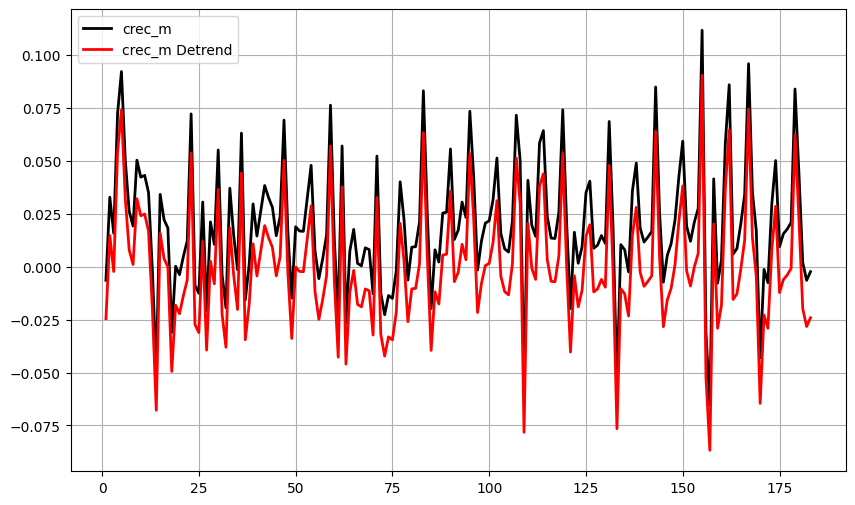

In [29]:
# Procedemos a hacer el mismo analisis anterior pero ahora con crecimiento monetario

adf = adfuller(df["crec_m"].dropna(), regression="c", autolag="AIC")
print("ADF para crec_m con C")
print("Estadístico ADF:", adf[0])
print("p-valor:", adf[1])
print("Número de rezagos usados:", adf[2])
print("Número de observaciones usadas:", adf[3])
print("Valores críticos:", adf[4],"\n")

adf = adfuller(df["crec_m"].dropna(), regression="ct", autolag="AIC")
print("ADF para crec_m con CT")
print("Estadístico ADF:", adf[0])
print("p-valor:", adf[1])
print("Número de rezagos usados:", adf[2])
print("Número de observaciones usadas:", adf[3])
print("Valores críticos:", adf[4],"\n")

print("\nEn ambos casos rechazamos al 10%, pero vamos a corrobar que la T.D. es significativa o no; para esto vamos a correr una regresion con el numero de lags arrojados por ADF corrido con CT\n")

# corro la regresion para saber si la TD es significativa

k_lags = adf[2]
y = df["crec_m"].dropna()
T = len(y)
t = np.arange(1, T + 1) # tendencia lineal
dy = y.diff()

X = pd.DataFrame({
    "const": 1.0,
    "trend": t,
    "y_lag1": y.shift(1),
})

# agrega Δy_{t-i}, i=1..k
for i in range(1, k_lags+1):
    X[f"dy_lag{i}"] = dy.shift(i)

# variable dependiente: Δy_t
Y = dy

# 3) alineá y ajustá OLS
data = pd.concat([Y, X], axis=1).dropna()
Y_ols = data.iloc[:, 0]
X_ols = data.iloc[:, 1:]

res = sm.OLS(Y_ols, X_ols).fit()
print(res.summary())

print("\nLa regresion nos arrojó que efectivamente la T.D. es significativa, ya que su p-value en la fila trend dio 0.057 < 0.1; por lo que entonces debemos proceder a quitar esa tendencia\n")

# Remuevo la tendencia deterministica en crec_m

df["crec_m_detrend"] = np.nan
serie = df['crec_m'].dropna()
df.loc[serie.index,"crec_m_detrend"] = signal.detrend(serie.values, type='linear')

adf = adfuller(df["crec_m_detrend"].dropna(), regression="c", autolag="AIC")
print("Estadístico ADF:", adf[0])
print("p-valor:", adf[1])
print("Número de rezagos usados:", adf[2])
print("Número de observaciones usadas:", adf[3])
print("Valores críticos:", adf[4],"\n")

print("\nFinalmente podemos decir que crec_m es una seria I(0) con Tendencia Deterministica\n")

# Grafico para ver ambas series

plt.figure(figsize=(10, 6))
plt.plot(df['crec_m'], label="crec_m", color="black", linewidth=2)
plt.plot(df['crec_m_detrend'], label="crec_m Detrend", color="red", linewidth=2)
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# Corro el modelo VAR sin la T.D.

df_var = df[['inflacion_detrend', 'crec_m_detrend']].dropna()

model = VAR(df_var)
sel = model.select_order(maxlags=24, trend="c")
print("\n=== Selección de rezagos ===")
print(sel.summary())

# Fitteo con el número de rezagos seleccionados por AIC, en este caso 13

results = model.fit(sel.aic)
print("\n=== Resumen VAR ===")
print(results.summary())

# Checkeo estabilidad del modelo

roots_crec = results.roots
print(np.abs(roots_crec))
print("\nVerificamos que en modulo todas las raiz son mayores a 1\n")


=== Selección de rezagos ===
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -16.52      -16.49   6.665e-08      -16.51
1       -16.81     -16.70*   4.988e-08      -16.77
2       -16.86      -16.67   4.749e-08     -16.78*
3       -16.87      -16.60   4.724e-08      -16.76
4       -16.89      -16.54   4.631e-08      -16.75
5       -16.87      -16.44   4.735e-08      -16.69
6       -16.85      -16.35   4.794e-08      -16.65
7       -16.88      -16.30   4.667e-08      -16.65
8       -16.86      -16.20   4.789e-08      -16.59
9       -16.81      -16.08   4.999e-08      -16.52
10      -16.90      -16.09   4.574e-08      -16.57
11      -16.94      -16.05   4.431e-08      -16.58
12      -17.07      -16.10   3.883e-08      -16.68
13     -17.11*      -16.07  3.724e-08*      -16.69
14      -17.07      -15.95   3.891e-08      -16.62
15      -17.07      -15.87   3.909e-08      -16.58
1

C:\Users\fsanches\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [35]:
# Correo el test de Causalidad Granger

print("\n=== Test de Causalidad de Granger ===")
varnames = df_var.columns
for caused in varnames:
    causing = [v for v in varnames if v != caused]
    test = results.test_causality(caused=caused, causing=causing, kind="f", signif=0.1)
    print(f"Hipótesis: {causing} → {caused}")
    print(test.summary())
    print()

print("\nBasandonos en los resultados, efectivamente podemos decir que con una cantidad de 13 rezagos, el crecimiento en la base monetaria causa en sentido de Granger a la inflacion")


=== Test de Causalidad de Granger ===
Hipótesis: ['crec_m_detrend'] → inflacion_detrend
Granger causality F-test. H_0: crec_m_detrend does not Granger-cause inflacion_detrend. Conclusion: reject H_0 at 10% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
         1.715          1.548   0.057 (13, 286)
-----------------------------------------------

Hipótesis: ['inflacion_detrend'] → crec_m_detrend
Granger causality F-test. H_0: inflacion_detrend does not Granger-cause crec_m_detrend. Conclusion: reject H_0 at 10% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
         1.705          1.548   0.059 (13, 286)
-----------------------------------------------


Basandonos en los resultados, efectivamente podemos decir que con una cantidad de 13 rezagos, el crecimiento en la base monetaria causa en sentido de Granger a la inflacion


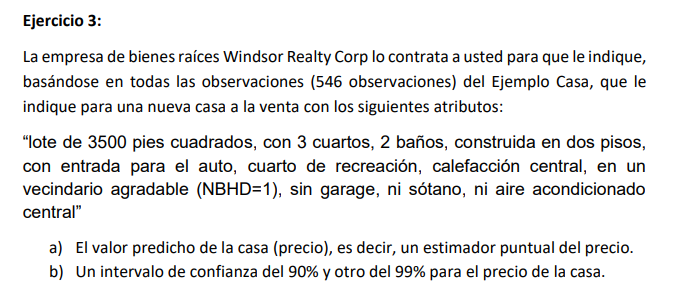

In [39]:
# Cargo el dataset de casas

dfcasa = pd.read_excel('Ejemplo_Casa.xls', sheet_name='HPRICE', usecols='A:L')

# Seteo mis variables a estimar

y = dfcasa['PRECIO']
X = dfcasa.drop(columns='PRECIO')
X = sm.add_constant(X)

# Corro la regresion

reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PRECIO   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     99.97
Date:                Sat, 30 Aug 2025   Prob (F-statistic):          6.18e-122
Time:                        10:55:18   Log-Likelihood:                -6034.1
No. Observations:                 546   AIC:                         1.209e+04
Df Residuals:                     534   BIC:                         1.214e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4038.3504   3409.471     -1.184      0.237   -1.07e+04    2659.271
LOTE           3.5463      0.350     10.124      0.000       2.858       4.234
CUARTOS     1832.0035   1047.000      1.750      0.081    -224.741    3888.748
BANOS       1.434e+04   1489.921      9.622      0.000    1.14e+04    1.73e+04
PISOS       6556.9457    925.290      7.086      0.000    4739.291    8374.600
ENTRADA     6687.7789   2045.246      3.270      0.001    2670.065    1.07e+04
REC         4511.2838   1899.958      2.374      0.018     778.976    8243.592
SOTANO      5452.3855   1588.024      3.433      0.001    2332.845    8571.926
CALEF       1.283e+04   3217.597      3.988      0.000    6510.706    1.92e+04
AIRE        1.263e+04   1555.021      8.124      0.000    9578.182    1.57e+04
GARAGE      4244.8290    840.544      5.050      0.000    2593.650    5896.008
NBHD        9369.5132   1669.091      5.614      0.000    6090.724    1.26e+04
==============================================================================
Omnibus:                       93.454   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.620
Skew:                           0.853   Prob(JB):                     1.70e-54
Kurtosis:                       5.824   Cond. No.                     3.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# a)
nueva_casa = pd.DataFrame({
    'LOTE':[3500],
    'CUARTOS':[3],
    'BANOS':[2],
    'PISOS':[2],
    'ENTRADA':[1],
    'REC':[1],
    'SOTANO':[0],
    'CALEF':[1],
    'AIRE':[0],
    'GARAGE':[0],
    'NBHD':[1]
    })

y_pred = reg.params['const'] + \
        nueva_casa['LOTE'] * reg.params['LOTE'] + \
        nueva_casa['CUARTOS'] * reg.params['CUARTOS'] + \
        nueva_casa['BANOS'] * reg.params['BANOS'] + \
        nueva_casa['PISOS'] * reg.params['PISOS'] + \
        nueva_casa['ENTRADA'] * reg.params['ENTRADA'] + \
        nueva_casa['REC'] * reg.params['REC'] + \
        nueva_casa['SOTANO'] * reg.params['SOTANO'] + \
        nueva_casa['CALEF'] * reg.params['CALEF'] + \
        nueva_casa['AIRE'] * reg.params['AIRE'] + \
        nueva_casa['GARAGE'] * reg.params['GARAGE'] + \
        nueva_casa['NBHD'] * reg.params['NBHD']

print(f"El precio seria: {y_pred[0].round(2)}")

El precio seria: 89054.71


In [ ]:
# b)
# IC para 90%
pred = reg.get_prediction()
IC_pred = pred.summary_frame(alpha = 0.1)

print("\nDonde la tercera y cuarta columnas son las bandas de confianza al 90% y la quinta y sexta las bandas de prediccion\n")
IC_pred


Donde las tercera y la cuarta columnas son las bandas de confianza al 90% y la quinta y sexta las bandas de prediccion



,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,66037.975672,1790.507321,63087.735069,68988.216275,40454.328871,91621.622474
1,41391.151457,1406.499937,39073.644472,43708.658442,15872.728648,66909.574266
2,39889.630131,1534.101619,37361.872308,42417.387953,14351.254621,65428.005640
3,63689.087331,2262.055723,59961.870714,67416.303948,38004.243400,89373.931261
4,49760.426466,1567.689375,47177.325693,52343.527240,24216.513813,75304.339120
...,...,...,...,...,...,...
541,97210.767132,2706.697182,92750.909396,101670.624868,71409.422302,123012.111963
542,96955.046870,2311.976108,93145.575830,100764.517911,71258.137841,122651.955899
543,105711.159701,2624.759239,101386.312105,110036.007296,79932.808885,131489.510516
544,92597.268278,2344.546772,88734.130159,96460.406397,66892.348512,118302.188043


In [63]:
# IC para 99%
pred = reg.get_prediction()
IC_pred = pred.summary_frame(alpha = 0.01)

print("\nDonde las tercera y cuarta columnas son las bandas de confianza al 99% y la quinta y sexta las bandas de prediccion\n")
IC_pred


Donde las tercera y cuarta columnas son las bandas de confianza al 99% y la quinta y sexta las bandas de prediccion



,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,66037.975672,1790.507321,61409.393597,70666.557748,25900.229319,106175.722026
1,41391.151457,1406.499937,37755.254344,45027.048569,1355.733910,81426.569003
2,39889.630131,1534.101619,35923.874072,43855.386189,-177.090866,79956.351127
3,63689.087331,2262.055723,57841.520862,69536.653799,23392.574530,103985.600132
4,49760.426466,1567.689375,45707.843796,53813.009136,9685.018339,89835.834594
...,...,...,...,...,...,...
541,97210.767132,2706.697182,90213.772530,104207.761734,56731.478060,137690.056204
542,96955.046870,2311.976108,90978.432842,102931.660898,56639.605343,137270.488397
543,105711.159701,2624.759239,98925.980201,112496.339200,65267.945546,146154.373855
544,92597.268278,2344.546772,86536.456887,98658.079668,52269.258842,132925.277713


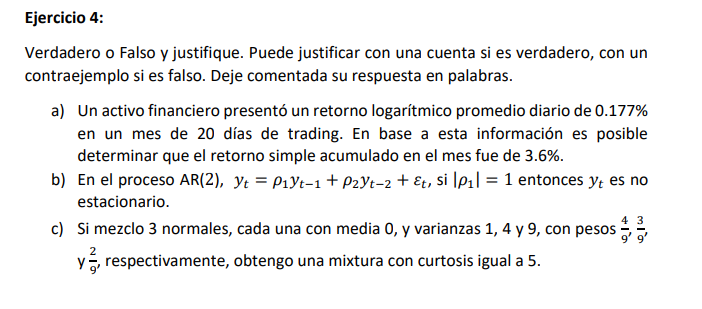

a)

Como estamos trabajando con retornos logaritmicos, podemos sumar los 20 retornos para obtener el retorno logaritmico acumulado del mes: 20 * 0.177% = 0.0354

De modo que P20 / P0 = e^0.0354 = 1.036 dandonos el Retono Simple Bruto

Y su retorno simple neto acumulado en el mes seria 1.036 - 1 = 3.6%

b) 

De ante mano no lo podemos saber, para esto habria que correr un test de raices unitarias, en cuyo caso tendriamos que ver que el modulo de las raices sean todas menores a 1.

Ya que el proceso se puede reescribir en terminos del lag operator en la forma: 𝑦𝑡(1 − 𝜌1𝐿 − 𝜌2𝐿2) = 𝜀𝑡

In [65]:
# c)
w1 = 4/9
mu1 = 0
var1 = 1

w2 = 3/9
mu2 = 0
var2 = 4

w3 = 2/9
mu3 = 0
var3 = 9

# Media de la mixtura
mu_mix = w1 * mu1 + w2 * mu2

# Varianza de la mixtura
var_mix = w1 * (var1 + (mu1 - mu_mix) ** 2) + w2 * (var2 + (mu2 - mu_mix) ** 2)
std_mix = np.sqrt(var_mix)

# Tercer momento centrado
mu_3 = (
    w1 * ((mu1 - mu_mix) ** 3 + 3 * (mu1 - mu_mix) * var1)
    + w2 * ((mu2 - mu_mix) ** 3 + 3 * (mu2 - mu_mix) * var2))

# Cuarto momento centrado
mu_4 = (
    w1 * ((mu1 - mu_mix) ** 4 + 6 * (mu1 - mu_mix) ** 2 * var1 + 3 * var1 ** 2)
    + w2 * ((mu2 - mu_mix) ** 4 + 6 * (mu2 - mu_mix) ** 2 * var2 + 3 * var2 ** 2))

kurtosis_total = mu_4 / (var_mix ** 2)

print(f"Se obtiene una Kurtosis con valor {kurtosis_total}")

Se obtiene una Kurtosis con valor 5.484375
